# Day 2

Today, we will start using nf-core pipelines to find differentially abundant genes in our dataset. 
We are using data from the following paper: https://www.nature.com/articles/s41593-023-01350-3#Sec10

1. Please take some time to read through the paper and understand their approach, hypotheses and goals.

What was the objective of the study?

The objective was to better understand the transcriptomic effects of chronic opioid exposure and physical dependence under chronic pain states in the brain reward circuitry.

What do the conditions mean?

oxy: oxycodone injections


sal: saline injections (control)

What do the genotypes mean?

SNI: spared nerve injury surgery


Sham: placebo surgery (control)

Imagine you are the bioinformatician in the group who conducted this study. They hand you the raw files and ask you to analyze them.

What would you do?

Which groups would you compare to each other?

Please also mention which outcome you would expect to see from each comparison.

For differential abundance analysis, I would start with quality control of the raw data, align reads, and generate a count matrix. Then, I would perform QC to detect outliers, filter lowly expressed genes, and normalize the data. Finally, I would correct for batch effects if necessary.

It would be interesting to compare the Sham-Sal mice with the Sham-Oxy mice to see how oxycodone affects gene expression in healthy mice. It would also be interesting to compare SNI-Sal to SNI-Oxy to see how oxycodone affects mice with spared nerve injury. By quantifying the difference between Sham-Sal and Sham-Oxy, and comparing it to the difference between SNI-Sal and SNI-Oxy, we can assess the impact of oxycodone in Sham versus SNI mice. If I was interested in the influence of spared nerve injury on gene expression, I would compare the SNI-Sal to the Sham-Sal mice. To investigate the influence of chronic neuropathic pain states with combined oxycodone exposure, I would compare the SNI-Oxy mice with the Sham-Sal mice. 

In each comparison, I would expect to see differences in gene expression between the groups. 

Your group gave you a very suboptimal excel sheet (conditions_runs_oxy_project.xlsx) to get the information you need for each run they uploaded to the SRA.<br>
So, instead of directly diving into downloading the data and starting the analysis, you first need to sort the lazy table.<br>
Use Python and Pandas to get the table into a more sensible order.<br>
Then, perform some overview analysis and plot the results
1. How many samples do you have per condition?
2. How many samples do you have per genotype?
3. How often do you have each condition per genotype?

In [1]:
import pandas as pd
import numpy as np

df = pd.read_excel('conditions_runs_oxy_project.xlsx')

In [22]:
print('# samples for condtion Sal: ', np.sum(df['condition: Sal'] == 'x'))
print('# samples for condtion Oxy: ', np.sum(df['Condition: Oxy'] == 'x'))

# samples for condtion Sal:  8
# samples for condtion Oxy:  8


In [24]:
print('# samples for genotype SNI: ' , np.sum(df['Genotype: SNI'] == 'x'))
print('# samples for genotype Sham: ', np.sum(df['Genotype: Sham'] == 'x'))

# samples for genotype SNI:  8
# samples for genotype Sham:  8


In [34]:
print('# condition Sal for genotype SNI: ', np.sum(df.loc[df['Genotype: SNI'] == 'x']['condition: Sal'] == 'x'))
print('# condition Oxy for genotype SNI: ', np.sum(df.loc[df['Genotype: SNI'] == 'x']['Condition: Oxy'] == 'x'))

# condition Sal for genotype SNI:  4
# condition Oxy for genotype SNI:  4


In [35]:
print('# condition Sal for genotype Sham: ', np.sum(df.loc[df['Genotype: Sham'] == 'x']['condition: Sal'] == 'x'))
print('# condition Oxy for genotype Sham: ', np.sum(df.loc[df['Genotype: Sham'] == 'x']['Condition: Oxy'] == 'x'))

# condition Sal for genotype Sham:  4
# condition Oxy for genotype Sham:  4


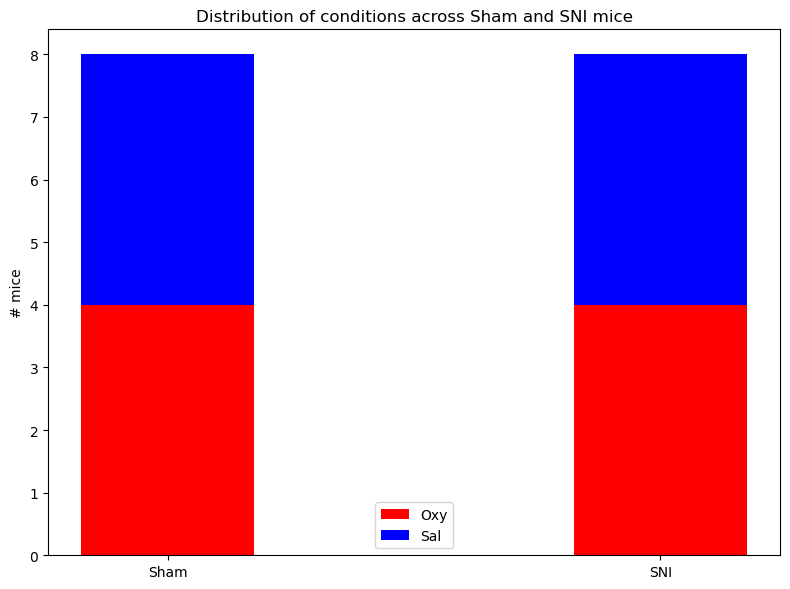

In [15]:
import matplotlib.pyplot as plt
import numpy as np

labels = ['Sham', 'SNI']
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 6))

for i in range(2):
    ax.bar(x[i], 4, width, label='Oxy' if i == 0 else '', color='red', zorder=2)
    ax.bar(x[i], 8, width, label='Sal' if i == 0 else '', color='blue')

ax.set_ylabel('# mice')
ax.set_title('Distribution of conditions across Sham and SNI mice')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.tight_layout()
plt.show()

They were so kind to also provide you with the information of the number of bases per run, so that you can know how much space the data will take on your Cluster.<br>
Add a new column to your fancy table with this information (base_counts.csv) and sort your dataframe according to this information and the condition.

Then select the 2 smallest runs from your dataset and download them from SRA (maybe an nf-core pipeline can help here?...)

In [36]:
base_counts = pd.read_csv('base_counts.csv')

In [38]:
df = pd.merge(df, base_counts, on='Run')

In [ ]:
df.sort_values('Bases', ignore_index=True, inplace=True)

In [45]:
df.iloc[:2]['Run']

0    SRR23195516
1    SRR23195511
Name: Run, dtype: object

In [1]:
!nextflow run nf-core/fetchngs -profile docker --input 'run_ids.csv' --outdir './results'

/bin/bash: warning: setlocale: LC_ALL: cannot change locale (en_US.UTF-8)
bash: warning: setlocale: LC_ALL: cannot change locale (en_US.UTF-8)
Nextflow 24.04.4 is available - Please consider updating your version to it
N E X T F L O W  ~  version 23.10.1
Launching `https://github.com/nf-core/fetchngs` [evil_goldwasser] DSL2 - revision: 8ec2d934f9 [master]
WARN: Access to undefined parameter `monochromeLogs` -- Initialise it to a default value eg. `params.monochromeLogs = some_value`


------------------------------------------------------
                                        ,--./,-.
        ___     __   __   __   ___     /,-._.--~'
  |\ | |__  __ /  ` /  \ |__) |__         }  {
  | \| |       \__, \__/ |  \ |___     \`-._,-`-,
                                        `._,._,'
  nf-core/fetchngs v1.12.0-g8ec2d93
------------------------------------------------------
Core Nextflow options
  revision       : master
  runName        : evil_goldwasser
  containerEngine: docker
  launchDi

While your files are downloading, get back to the paper and explain how you would try to reproduce the analysis.<br>
When you are done with this shout, so we can discuss the different ideas.

I would reproduce the analysis using an nf-core pipeline, likely `nf-core/rnaseq`, to analyze gene expression from RNA-seq data. This will allow me to compare transcriptional activity across brain regions and identify gene expression profiles linked to the treatment.